In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [3]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [4]:
df_DA_US_explode["job_posted_month_no"] = df_DA_US_explode["job_posted_date"].dt.month

df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0
)

In [5]:
df_DA_US_pivot.loc["Total"] = df_DA_US_pivot.sum()

In [6]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc["Total"].sort_values(ascending=False).index].drop("Total")

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_DA_US["job_posted_month_no"] = df_DA_US["job_posted_date"].dt.month

DA_totals = df_DA_US.groupby("job_posted_month_no").size()

In [8]:
df_DA_US_perc = df_DA_US_pivot.div(DA_totals / 100, axis=0)

# changes month number to month name
df_DA_US_perc = df_DA_US_perc.reset_index()
df_DA_US_perc["job_posted_month"] = df_DA_US_perc["job_posted_month_no"].apply(
    lambda x: pd.to_datetime(x, format="%m").strftime("%b")
)
df_DA_US_perc = df_DA_US_perc.set_index("job_posted_month")
df_DA_US_perc = df_DA_US_perc.drop(columns="job_posted_month_no")

df_DA_US_perc.iloc[:, :5]

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


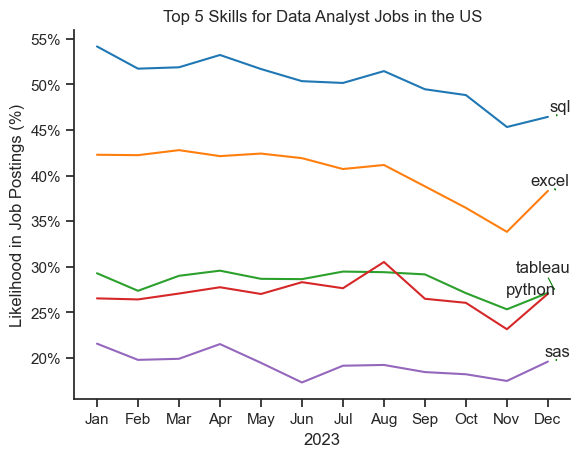

In [14]:
from adjustText import adjust_text

df_plot = df_DA_US_perc.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Top 5 Skills for Data Analyst Jobs in the US")
plt.ylabel("Likelihood in Job Postings (%)")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i in range(5):
    texts.append(plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='green', lw=0.8))

plt.show()